# Fetal Health Classification using Decision Tree Classifier

First, let us perform exploratory data analysis to know about the attributes, size and null values present in our dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data1.csv')
print(data.shape)
print(data.head())
print(data.info())

(1450, 22)
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             132          0.006           0.000                 0.006   
1             133          0.003           0.000                 0.008   
2             134          0.003           0.000                 0.008   
3             132          0.007           0.000                 0.008   
4             131          0.005           0.072                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.003                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.000                   0.0                       0.0   
4                0.003                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                      

Splitting the dataset into training set and test set, using 80% of the data for training and 20% for testing.

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('fetal_health', axis=1)
Y = data['fetal_health']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape

((1160, 21), (290, 21))

Using the training data to train the Decision Tree Classifier.

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Testing the performance of the Decision Tree on test data using metrics like precision, recall and f1-score.

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
Y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred, digits=3))

[[222   9   0]
 [  7  41   0]
 [  1   0  10]]
              precision    recall  f1-score   support

           1      0.965     0.961     0.963       231
           2      0.820     0.854     0.837        48
           3      1.000     0.909     0.952        11

    accuracy                          0.941       290
   macro avg      0.928     0.908     0.917       290
weighted avg      0.943     0.941     0.942       290



Plotting the Decision Tree for visualization purpose.

In [5]:
from sklearn import tree
fig = plt.figure(figsize=(150,150))
tree_plot = tree.plot_tree(clf, feature_names=X.columns, class_names=np.unique(Y).astype('str'), filled=True)

Saving the plot as a .png file.

In [6]:
fig.savefig("DT1.png")

Defining a function to plot the AUC-ROC curve which will help in evaluating the performance of our model.

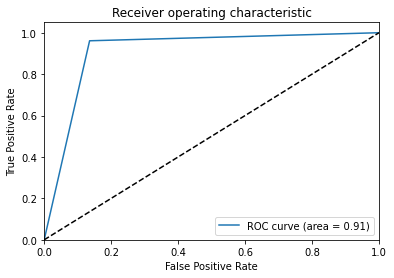

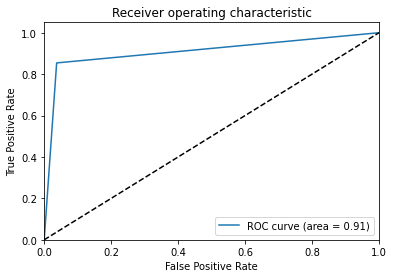

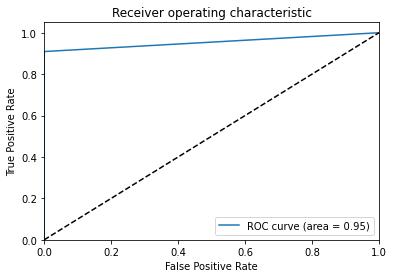

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
def get_AUC_ROC_curve(Y_test, Y_pred, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 3
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
Y_test_bin = label_binarize(Y_test, classes = [1,2,3])
Y_pred_bin = label_binarize(Y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, Y_pred_bin, 3)

Plotting Accuracy vs Depth graph to study how depth of the Decision Tree affects its accuracy.

Max depth of the DT = 11


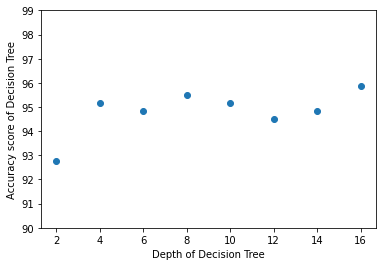

In [8]:
n = 8
x_axis = [n]
y_axis = [n]
for i in range(n):
    dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=(i+1)*2)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append((i+1)*2)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
print("Max depth of the DT = "+str(clf.tree_.max_depth))
plt.ylim([90, 99])
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()

Now, let us vary different parameters of the Decision Tree and observe its impact on performance. First we are changing the criterion from 'entropy' to 'gini'.

[[212  19   0]
 [  8  39   1]
 [  0   0  11]]
              precision    recall  f1-score   support

           1      0.964     0.918     0.940       231
           2      0.672     0.812     0.736        48
           3      0.917     1.000     0.957        11

    accuracy                          0.903       290
   macro avg      0.851     0.910     0.878       290
weighted avg      0.914     0.903     0.907       290



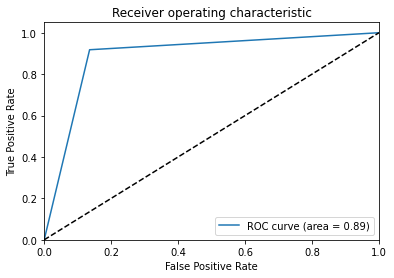

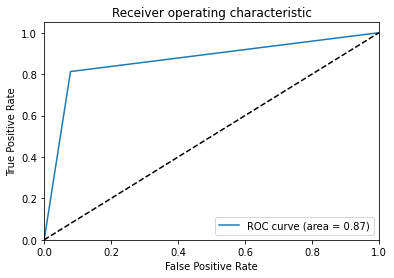

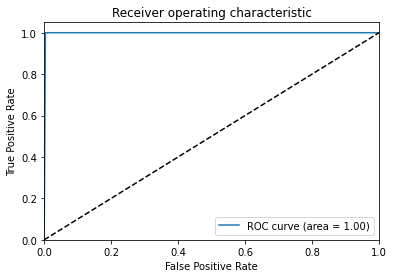

In [9]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini.fit(X_train, Y_train)
y_pred_gini = clf_gini.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_gini))
print(metrics.classification_report(Y_test, y_pred_gini, digits=3))
Y_test_bin = label_binarize(Y_test, classes = [1,2,3])
y_pred_bin = label_binarize(y_pred_gini, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Changing the value of splitter to 'random' from its default value 'best' and keeping all other parameters default.

[[220  11   0]
 [  8  38   2]
 [  1   0  10]]
              precision    recall  f1-score   support

           1      0.961     0.952     0.957       231
           2      0.776     0.792     0.784        48
           3      0.833     0.909     0.870        11

    accuracy                          0.924       290
   macro avg      0.857     0.884     0.870       290
weighted avg      0.925     0.924     0.925       290



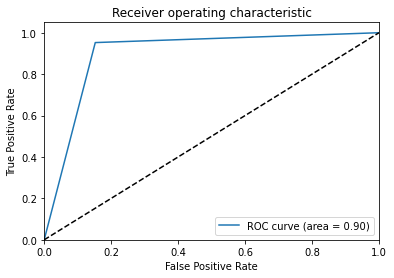

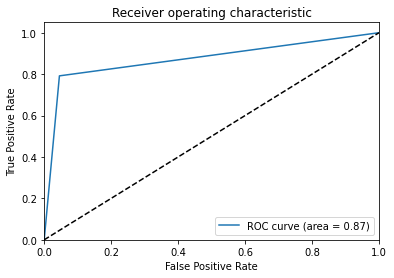

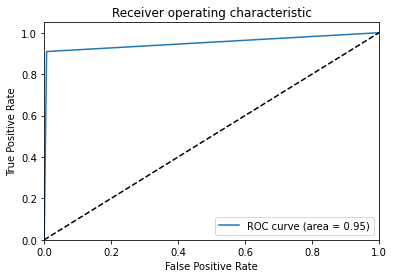

In [10]:
clf_split_random = DecisionTreeClassifier(criterion='entropy', random_state=1, splitter='random')
clf_split_random.fit(X_train, Y_train)
y_pred_random = clf_split_random.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_random))
print(metrics.classification_report(Y_test, y_pred_random, digits=3))
y_pred_bin = label_binarize(y_pred_random, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying min_samples_split from its default value = 2.

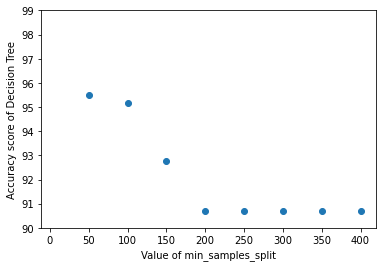

[[228   3   0]
 [ 10  38   0]
 [  1   0  10]]
              precision    recall  f1-score   support

           1      0.954     0.987     0.970       231
           2      0.927     0.792     0.854        48
           3      1.000     0.909     0.952        11

    accuracy                          0.952       290
   macro avg      0.960     0.896     0.926       290
weighted avg      0.951     0.952     0.950       290



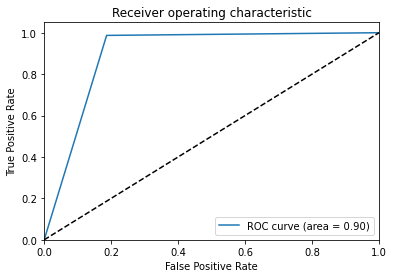

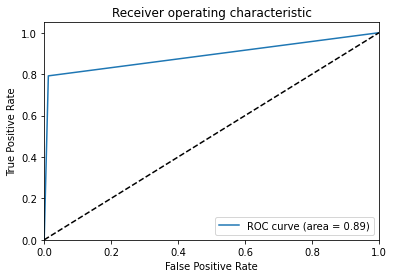

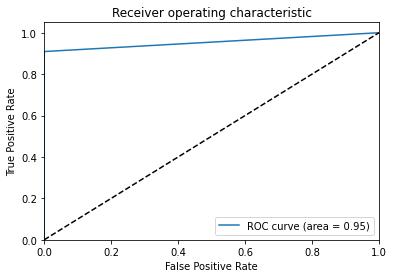

In [11]:
n = 8
x_axis = [n]
y_axis = [n]
for i in range(1,n+1):
    dt_en = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_split = i*50)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append(i*50)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
plt.ylim([90, 99])
plt.xlabel('Value of min_samples_split')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()
clf = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_split=100) # Training a DT for min_samples_split=100
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying min_samples_leaf from its default value = 1.

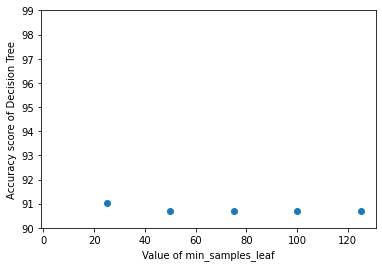

[[217  14   0]
 [  5  41   2]
 [  1   4   6]]
              precision    recall  f1-score   support

           1      0.973     0.939     0.956       231
           2      0.695     0.854     0.766        48
           3      0.750     0.545     0.632        11

    accuracy                          0.910       290
   macro avg      0.806     0.780     0.785       290
weighted avg      0.919     0.910     0.912       290



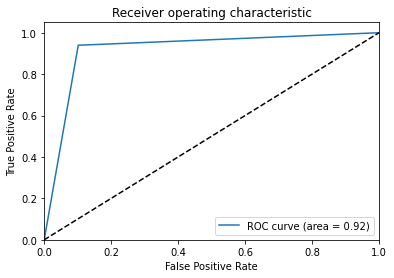

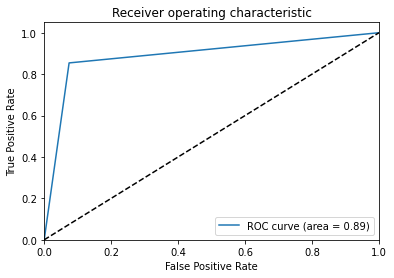

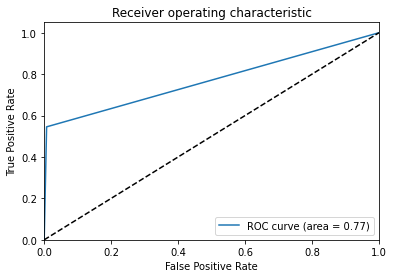

In [12]:
n = 5
x_axis = [n]
y_axis = [n]
for i in range(1,n+1):
    dt_en = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_leaf = i*25)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append(i*25)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
plt.ylim([90, 99])
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()
clf = DecisionTreeClassifier(criterion='entropy', random_state=1, min_samples_leaf=25) # Training a DT for min_samples_leaf=25
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Changing max_features from its default value = None, to max_features = 'log2'.

[[222   9   0]
 [  4  40   4]
 [  0   0  11]]
              precision    recall  f1-score   support

           1      0.982     0.961     0.972       231
           2      0.816     0.833     0.825        48
           3      0.733     1.000     0.846        11

    accuracy                          0.941       290
   macro avg      0.844     0.931     0.881       290
weighted avg      0.945     0.941     0.942       290



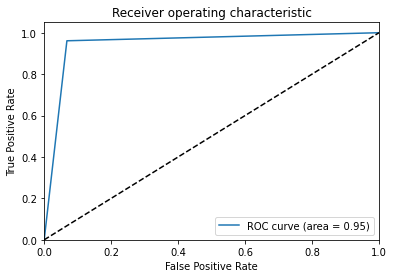

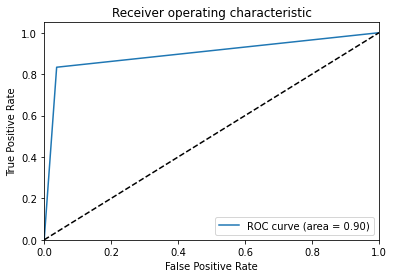

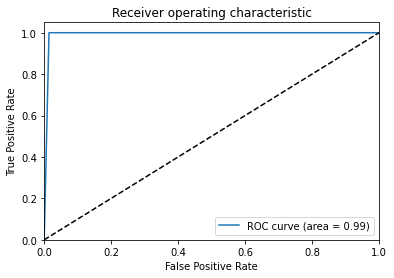

In [13]:
clf_max_features = DecisionTreeClassifier(criterion='entropy', random_state=1, max_features='log2')
clf_max_features.fit(X_train, Y_train)
y_pred_max_features = clf_max_features.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_max_features))
print(metrics.classification_report(Y_test, y_pred_max_features, digits=3))
y_pred_bin = label_binarize(y_pred_max_features, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying class_weight from its default value=None, to class_weight = 'balanced'.

[[223   8   0]
 [  7  40   1]
 [  0   0  11]]
              precision    recall  f1-score   support

           1      0.970     0.965     0.967       231
           2      0.833     0.833     0.833        48
           3      0.917     1.000     0.957        11

    accuracy                          0.945       290
   macro avg      0.907     0.933     0.919       290
weighted avg      0.945     0.945     0.945       290



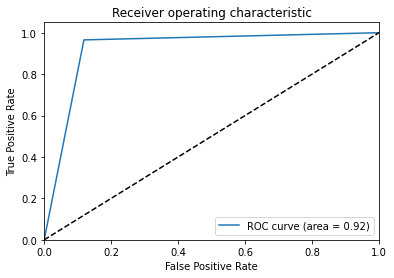

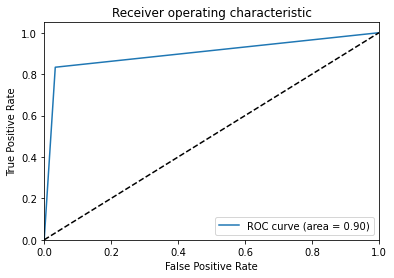

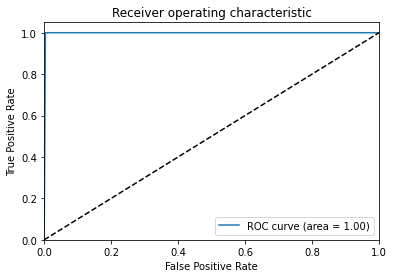

In [14]:
clf_class_weight = DecisionTreeClassifier(criterion='entropy', random_state=1, class_weight = 'balanced')
clf_class_weight.fit(X_train, Y_train)
y_pred_class_weight = clf_class_weight.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_class_weight))
print(metrics.classification_report(Y_test, y_pred_class_weight, digits=3))
y_pred_bin = label_binarize(y_pred_class_weight, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Varying max_leaf_nodes from its deafult value = None.

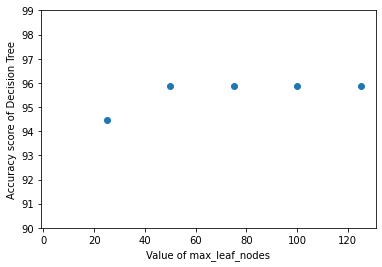

[[221  10   0]
 [  5  43   0]
 [  0   1  10]]
              precision    recall  f1-score   support

           1      0.978     0.957     0.967       231
           2      0.796     0.896     0.843        48
           3      1.000     0.909     0.952        11

    accuracy                          0.945       290
   macro avg      0.925     0.921     0.921       290
weighted avg      0.949     0.945     0.946       290



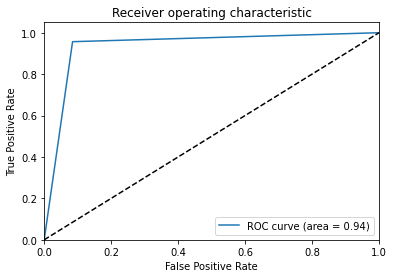

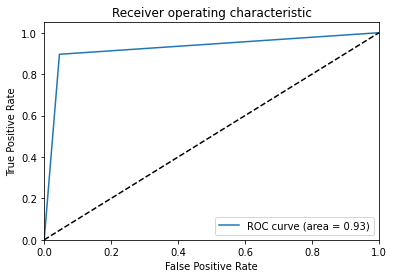

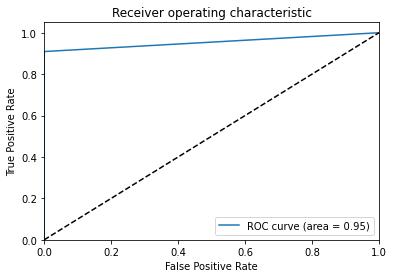

In [15]:
n = 5
x_axis = [n]
y_axis = [n]
for i in range(1,n+1):
    dt_en = DecisionTreeClassifier(criterion='entropy', random_state=1, max_leaf_nodes = i*25)
    dt_en.fit(X_train, Y_train)
    y_pred_en = dt_en.predict(X_test)
    x_axis.append(i*25)
    y_axis.append(accuracy_score(Y_test, y_pred_en)*100)
plt.ylim([90, 99])
plt.xlabel('Value of max_leaf_nodes')
plt.ylabel('Accuracy score of Decision Tree')
plt.plot(x_axis, y_axis, 'o')
plt.show()
clf = DecisionTreeClassifier(criterion='entropy', random_state=1, max_leaf_nodes=25) # Training a DT for max_leaf_nodes=25
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

Now let us prune our decision tree using pre-pruning techniques, For eg GridSearchCV.

Initial score:  0.9568965517241379
Initial parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0001, 'min_samples_split': 100}
[[228   3   0]
 [  9  38   1]
 [  0   0  11]]
              precision    recall  f1-score   support

           1      0.962     0.987     0.974       231
           2      0.927     0.792     0.854        48
           3      0.917     1.000     0.957        11

    accuracy                          0.955       290
   macro avg      0.935     0.926     0.928       290
weighted avg      0.954     0.955     0.954       290



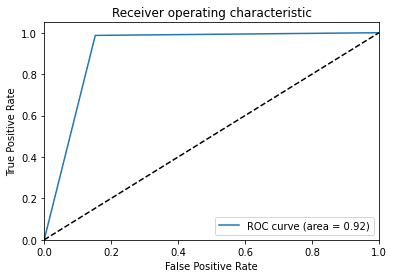

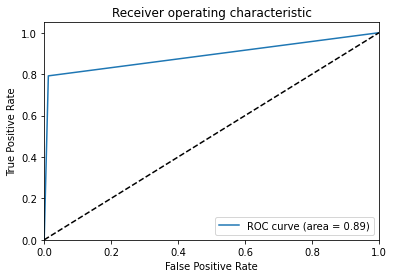

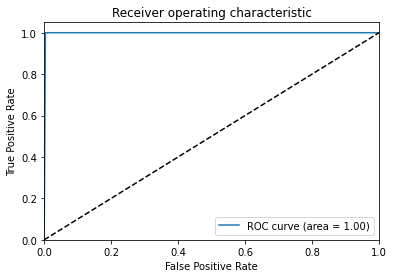

In [16]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'max_depth':[2,4,6,8,10], 'min_samples_split':[20,40,60,80,100], 'min_impurity_decrease':[0.0001, 0.0005, 0.001, 0.005, 0.01]}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), parameter_grid, cv=5, n_jobs=1)
gridSearch.fit(X_train, Y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)
p1 = gridSearch.best_params_['max_depth'] # Now we will use these best parameter values for our model
p2 = gridSearch.best_params_['min_samples_split']
p3 = gridSearch.best_params_['min_impurity_decrease']
clf = DecisionTreeClassifier(max_depth = p1, min_samples_split = p2, min_impurity_decrease = p3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred, digits=3))
y_pred_bin = label_binarize(y_pred, classes = [1,2,3])
get_AUC_ROC_curve(Y_test_bin, y_pred_bin, 3)

The above Decision Tree has the best performance obtained so far. Visualizing the decision tree after pruning.

In [17]:
fig = plt.figure(figsize=(150,150))
tree_plot = tree.plot_tree(clf, feature_names=X.columns, class_names=np.unique(Y).astype('str'), filled=True)

Saving the above visualization as a .png file.

In [18]:
fig.savefig("DT2")

Saving this Decision Tree Classifier.

In [19]:
import pickle
decision_tree_filename = "decision_tree_classifier_FHC.pkl"
decision_tree_model_pkl = open(decision_tree_filename, 'wb')
pickle.dump(clf, decision_tree_model_pkl)
decision_tree_model_pkl.close()

Now, let us use Hoeffding Tree Classifier to train our decision tree.

In [20]:
x = data.drop('fetal_health', axis=1)
y = data['fetal_health']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape

((1160, 21), (290, 21))

Using Hoeffding Tree Classifier.

In [21]:
from skmultiflow.trees import HoeffdingTreeClassifier
clf_hoeff = HoeffdingTreeClassifier()
x_train_numpy = x_train.to_numpy()
y_train_numpy = y_train.to_numpy()
clf_hoeff.fit(x_train_numpy, y_train_numpy)

HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        split_criterion='info_gain', stop_mem_management=False,
                        tie_threshold=0.05)

Evaluating the performance of this model.

In [ ]:
y_pred_numpy = clf_hoeff.predict(x_test.to_numpy())
y_pred_bin = pd.DataFrame(y_pred_numpy)
y_pred_bin = label_binarize(y_pred, classes=[1,2,3])
y_test_bin = label_binarize(y_test, classes=[1,2,3])
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print("accuracy of the model = "+str(accuracy))
precision = precision_score(y_test_bin, y_pred_bin, average='macro')
print("precision of the model = "+str(precision))
recall = recall_score(y_test_bin, y_pred_bin, average='macro')
print("recall of the model = "+str(recall))
get_AUC_ROC_curve(y_test_bin, y_pred_bin, 3)

Importing new data so that we can augment it with our existing model clf_hoeff.

In [ ]:
data_2 = pd.read_csv('data2.csv')
x2 = data_2.drop('fetal_health', axis=1)
y2 = data_2['fetal_health']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
x2_train.shape, x2_test.shape

Now we have data_2 available with us, so we can extend our model clf_hoeff to this new data without training our model from scratch.

In [ ]:
x2_train_numpy = x2_train.to_numpy()
y2_train_numpy = y2_train.to_numpy()
clf_hoeff = clf_hoeff.partial_fit(x2_train_numpy, y2_train_numpy)
y2_pred_numpy = clf_hoeff.predict(x2_test.to_numpy())
y2_pred = pd.DataFrame(y2_pred_numpy)
y2_pred = label_binarize(y2_pred, classes=[1,2,3])
y2_test = label_binarize(y2_test, classes=[1,2,3])
accuracy = accuracy_score(y2_test, y2_pred)
print("accuracy of the model = "+str(accuracy))
precision = precision_score(y2_test, y2_pred, average='macro')
print("precision of the model = "+str(precision))
recall = recall_score(y2_test, y2_pred, average='macro')
print("recall of the model = "+str(recall))
get_AUC_ROC_curve(y2_test, y2_pred, 3)